### Decision Tree Classification
CART= Classification and Regression Trees

In [79]:
from warnings import filterwarnings
filterwarnings("ignore")

In [80]:
import pandas as pd

In [81]:
df=pd.read_csv("iris (1).csv")

In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(1)

In [85]:
df=df.drop_duplicates(keep="first").reset_index(drop=True)

In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [88]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
Y=df["species"]
X=df.drop(columns="species")

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [91]:
numpipe=make_pipeline(SimpleImputer(strategy="mean"),StandardScaler()).set_output(transform="pandas")

In [92]:
X_pre=numpipe.fit_transform(X)

In [93]:
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624
...,...,...,...,...
144,1.034197,-0.137353,0.823571,1.454321
145,0.551140,-1.287108,0.710054,0.928046
146,0.792668,-0.137353,0.823571,1.059614
147,0.430375,0.782450,0.937088,1.454321


In [94]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.33,random_state=21)

In [95]:
xtrain.shape

(99, 4)

In [96]:
xtest.shape

(50, 4)

In [97]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(
    max_depth=1,
    min_samples_leaf=5,
    min_samples_split=5,
    criterion="gini"
)
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [98]:
model1.score(xtrain,ytrain)

0.6666666666666666

In [99]:
model1.score(xtest,ytest)

0.66

### Hpyer Parameter Tuning

In [100]:
param={
    "max_depth":[1,2,3,4,5,6,7,8],
    "min_samples_split":[5,6,7,8,9],
    "min_samples_leaf":[5,6,7,8,9]
    ,"criterion":["gini","entropy"]
}

In [101]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
gscv=GridSearchCV(dtc,param_grid=param,cv=5,scoring="f1_macro")
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [102]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [103]:
gscv.best_score_

np.float64(0.9395559995559996)

In [104]:
best_dtc=gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)

In [105]:
best_dtc.score(xtrain,ytrain)

0.9696969696969697

In [106]:
best_dtc.score(xtest,ytest)

0.94

In [144]:
xnew=pd.read_csv("iris_sample.csv")

In [145]:
xnew_pre=numpipe.transform(xnew)

In [146]:
pred=best_dtc.predict(xnew_pre)

In [147]:
best_dtc.predict(xtest)

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa'], dtype=object)

In [148]:
ytest.head()

92    versicolor
44        setosa
7         setosa
21        setosa
95    versicolor
Name: species, dtype: object

In [149]:
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.000000,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,0.000000,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.000000


In [150]:
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


### Evaluate

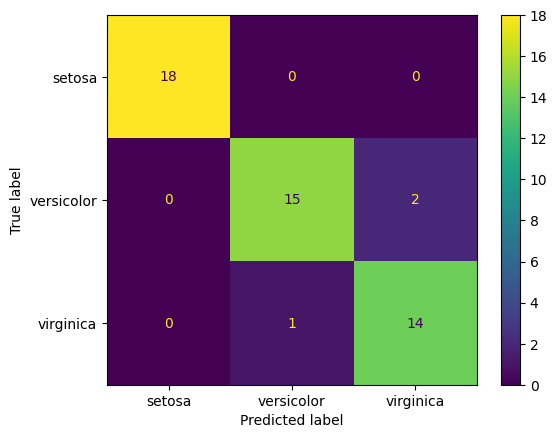

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

In [152]:
ypred_test=best_dtc.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [153]:
ytest.head()

92    versicolor
44        setosa
7         setosa
21        setosa
95    versicolor
Name: species, dtype: object

In [154]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.94      0.88      0.91        17
   virginica       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [155]:
### From Above Results My Model Is Good

In [156]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [157]:
prob=best_dtc.predict_proba(xnew_pre)

In [158]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [159]:
pred

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

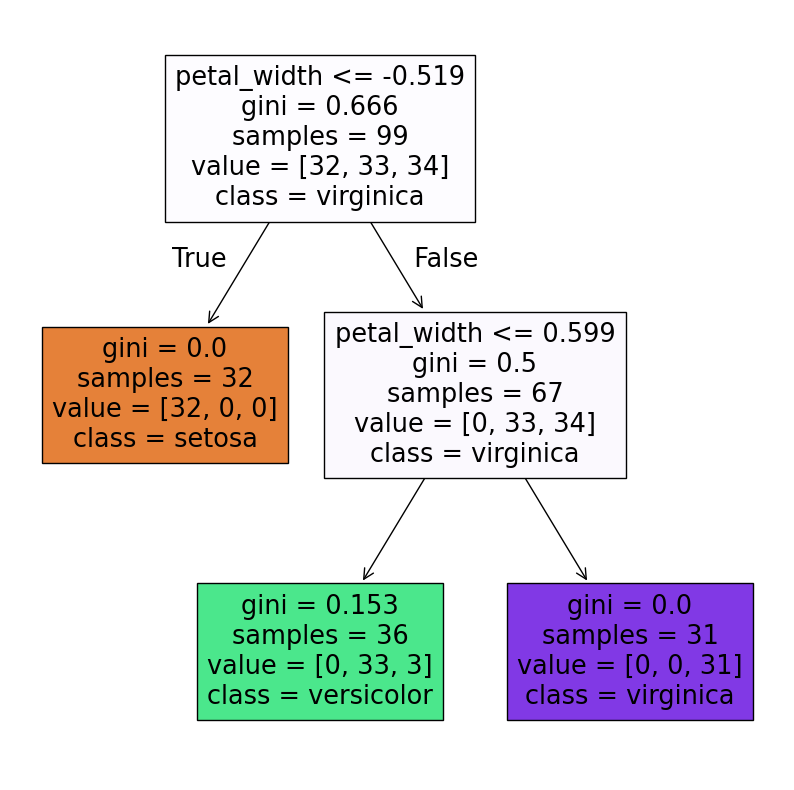

In [164]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(best_dtc,feature_names=xtrain.columns,class_names=best_dtc.classes_,filled=True)
plt.show()

In [162]:
xnew["species_predicted"]=pred
xnew[best_dtc.classes_]=prob


In [163]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_predicted,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,0.916667,0.083333
1,6.9,3.1,5.1,2.3,virginica,0.0,0.000000,1.000000
2,5.1,2.5,3.0,1.1,versicolor,0.0,0.916667,0.083333
3,4.4,2.9,NaN,0.2,setosa,1.0,0.000000,0.000000
4,5.9,3.0,5.1,1.8,virginica,0.0,0.000000,1.000000
5,5.5,3.5,1.3,0.2,setosa,1.0,0.000000,0.000000
6,5.6,NaN,3.6,1.3,versicolor,0.0,0.916667,0.083333
7,6.5,3.0,5.2,2.0,virginica,0.0,0.000000,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.0,0.000000,0.000000
9,5.1,3.4,1.5,NaN,versicolor,0.0,0.916667,0.083333


In [166]:
# Save preprocessor
import joblib


joblib.dump(numpipe, "pre.joblib")


['pre.joblib']

In [168]:
# Save the model
joblib.dump(best_dtc, "dtc.joblib")

['dtc.joblib']

In [169]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [170]:
m=joblib.load("dtc.joblib")
m

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)